In [1]:
import pandas as pd
import numpy as np
import math
import wandb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fftpack import fft
from keras.preprocessing.sequence import TimeseriesGenerator

# Small library of functions I put together for preparing data
# and evalutating models
import pegan3_ECE9603 as proj

pd.set_option('display.max_columns', 500)

#%matplotlib inline

2021-11-15 17:30:10.635584: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
df, dataName = proj.loadDataDf('PJME')
df = proj.preprocessData(df)
df

PJME_MW  Year  April  August  December  February  January  July  June  \
0       30393.0  2002      0       0         0         0        1     0     0   
1       29265.0  2002      0       0         0         0        1     0     0   
2       28357.0  2002      0       0         0         0        1     0     0   
3       27899.0  2002      0       0         0         0        1     0     0   
4       28057.0  2002      0       0         0         0        1     0     0   
...         ...   ...    ...     ...       ...       ...      ...   ...   ...   
145361  44057.0  2018      0       1         0         0        0     0     0   
145362  43256.0  2018      0       1         0         0        0     0     0   
145363  41552.0  2018      0       1         0         0        0     0     0   
145364  38500.0  2018      0       1         0         0        0     0     0   
145365  35486.0  2018      0       1         0         0        0     0     0   

        March  May  November  October  September  Friday  Monday  Saturday  \
0           0    0         0        0          0       0       0         0   
1           0    0         0        0          0       0       0         0   
2           0    0         0        0          0       0       0         0   
3           0    0         0        0          0       0       0         0   
4           0    0         0        0          0       0       0         0   
...       ...  ...       ...      ...        ...     ...     ...       ...   
145361      0    0         0        0          0       0       0         0   
145362      0    0         0        0          0       0       0         0   
145363      0    0         0        0          0       0       0         0   
145364      0    0         0        0          0       0       0         0   
145365      0    0         0        0          0       1       0         0   

        Sunday  Thursday  Tuesday  Wednesday    Time X    Time Y  
0            0         0        1          0  0.965926  0.258819  
1            0         0        1          0  0.866025  0.500000  
2            0         0        1          0  0.707107  0.707107  
3            0         0        1          0  0.500000  0.866025  
4            0         0        1          0  0.258819  0.965926  
...        ...       ...      ...        ...       ...       ...  
145361       0         1        0          0  0.500000 -0.866025  
145362       0         1        0          0  0.707107 -0.707107  
145363       0         1        0          0  0.866025 -0.500000  
145364       0         1        0          0  0.965926 -0.258819  
145365       0         0        0          0  1.000000  0.000000  

[145366 rows x 23 columns]

In [3]:
raw_df, dataName = proj.loadDataDf('PJME')
raw_df = raw_df.sort_values(by=['Datetime']).reset_index(drop=True)
raw_df

Datetime  PJME_MW
0       2002-01-01 01:00:00  30393.0
1       2002-01-01 02:00:00  29265.0
2       2002-01-01 03:00:00  28357.0
3       2002-01-01 04:00:00  27899.0
4       2002-01-01 05:00:00  28057.0
...                     ...      ...
145361  2018-08-02 20:00:00  44057.0
145362  2018-08-02 21:00:00  43256.0
145363  2018-08-02 22:00:00  41552.0
145364  2018-08-02 23:00:00  38500.0
145365  2018-08-03 00:00:00  35486.0

[145366 rows x 2 columns]

In [3]:
startYear = df['Year'].min()
stopYear = df['Year'].max()

x_train, x_test, y_train, y_test = proj.splitByYears(df, dataName, startYear, stopYear)
x_train_scaled, x_test_scaled = proj.scaleFeatures(x_train, x_test)
#y_train_scaled, y_test_scaled = scaleFeatures(y_train, y_test)

In [4]:
from keras.models import Sequential
from keras.layers import Dense
ann = Sequential()
feature_len = len(x_test.columns)

# Hidden layers
ann.add(Dense(units=10, input_shape=(feature_len,), activation='relu'))
ann.add(Dense(units=10, activation='relu'))
ann.add(Dense(units=1, activation='relu'))

ann.compile(optimizer='adam', loss='mean_squared_error')
ann.fit(x_train_scaled, y_train, epochs=80, workers=12, use_multiprocessing=True)

proj.evaluateModelPerformance(ann, df, x_test_scaled, y_test)

2021-11-15 05:23:31.686921: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-11-15 05:23:31.706000: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-15 05:23:31.706277: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:08:00.0 name: NVIDIA GeForce RTX 3080 Ti computeCapability: 8.6
coreClock: 1.71GHz coreCount: 80 deviceMemorySize: 11.77GiB deviceMemoryBandwidth: 849.46GiB/s
2021-11-15 05:23:31.706306: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-11-15 05:23:31.709479: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-11-15 05:23:31.709570: I tensorflow/stream_executor/

Epoch 1/80


KeyboardInterrupt: 

R2 Score: 0.6373021173503628 
Mean Absolute Error: 2923.0259264414185 
Root Mean Squared Error: 3781.6273000646006



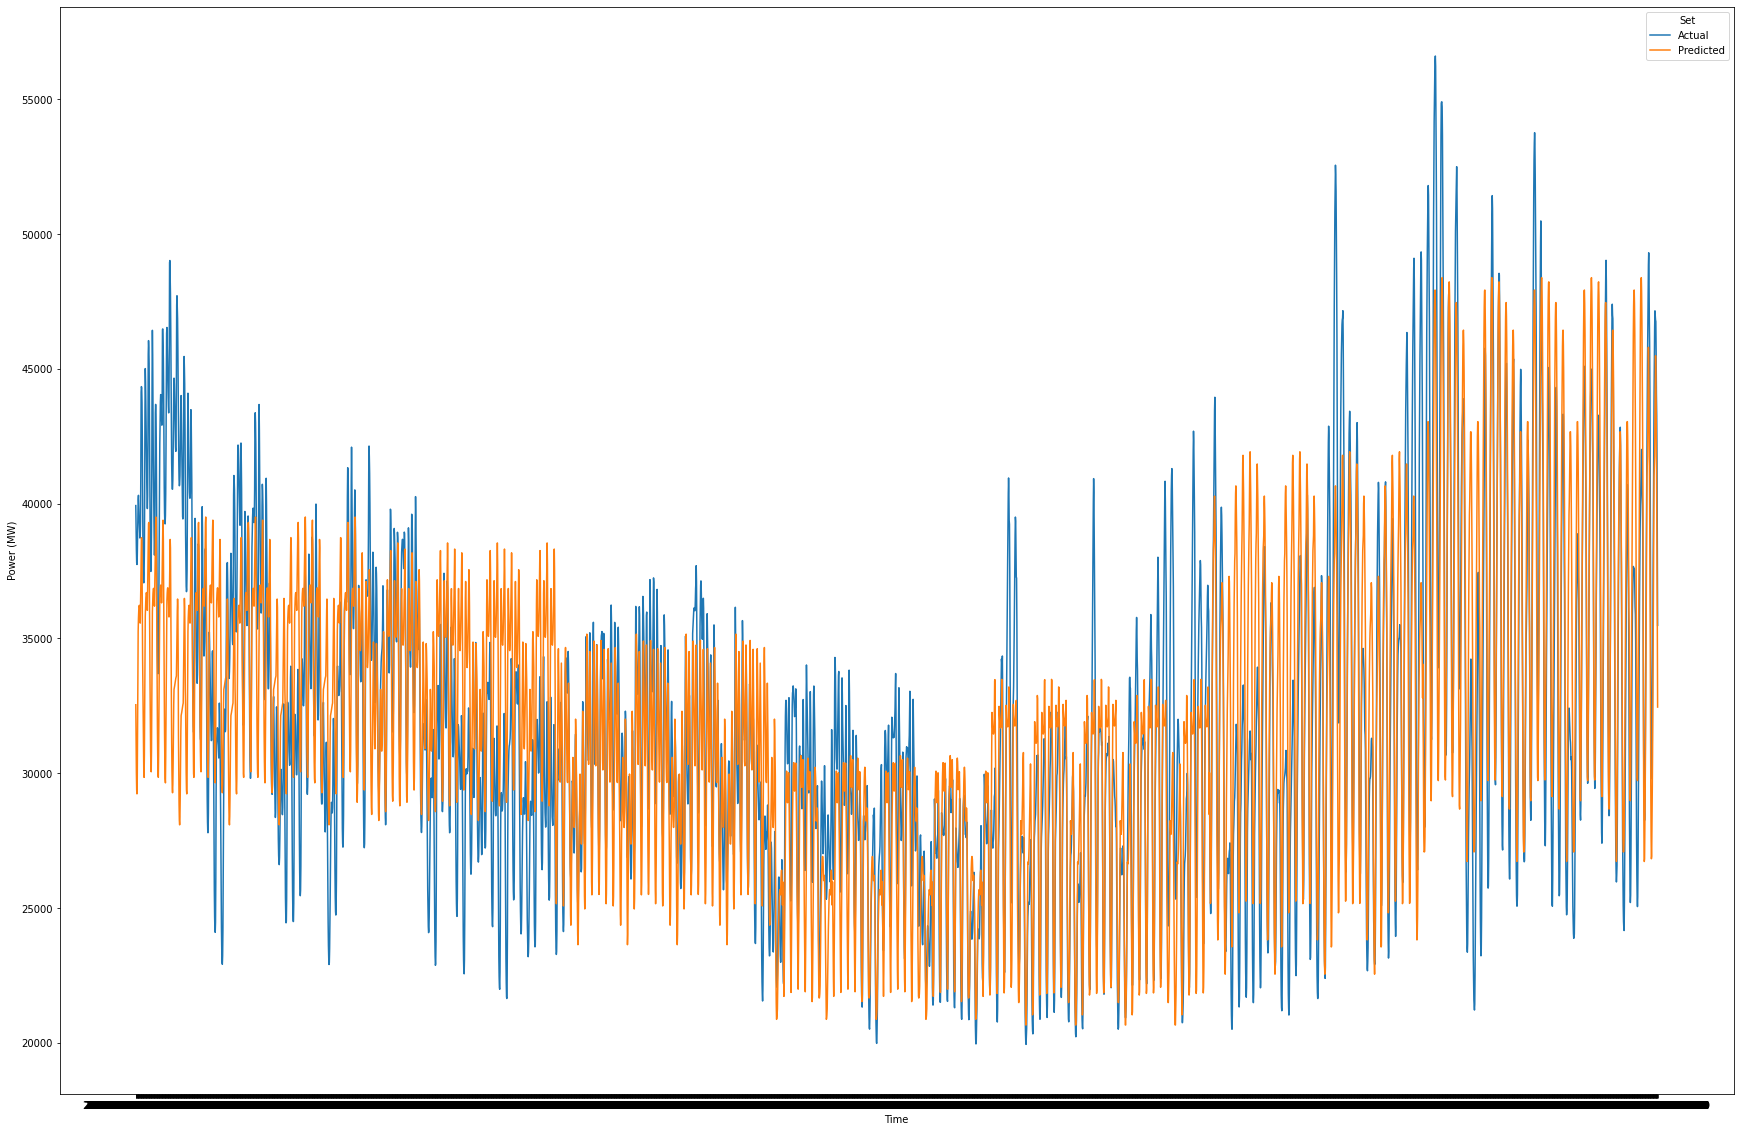

In [14]:
proj.evaluateModelPerformance(ann, df, x_test_scaled, y_test)

## Set X train and X test to include Power feature for timeseries models (RNN)

In [4]:
x_train_scaled, x_test_scaled, y_train, y_test = proj.getTimeSeriesTrainTest(df, dataName)

In [5]:
np.array(x_train_scaled).shape

(8755, 23)

In [7]:
hoursInADay = 24
data_gen = TimeseriesGenerator(x_train_scaled, y_train,
                               length=hoursInADay, sampling_rate=1,
                               stride=1, batch_size=1)

proj.logTimeseriesBatch(data_gen)

Number of batches: 8731
Checking first 5
[[[-1.77513113e-01  0.00000000e+00 -2.99119331e-01 -3.04749570e-01
   -3.04301702e-01 -2.88335653e-01  3.28379520e+00 -3.04749570e-01
   -2.99345895e-01 -3.04749570e-01 -3.04749570e-01 -2.99345895e-01
   -3.04525690e-01 -2.99345895e-01 -4.07731331e-01 -4.07731331e-01
   -4.07731331e-01 -4.07350233e-01 -4.07731331e-01  2.42881312e+00
   -4.07731331e-01  1.36696107e+00  3.66037910e-01]
  [-3.48192842e-01  0.00000000e+00 -2.99119331e-01 -3.04749570e-01
   -3.04301702e-01 -2.88335653e-01  3.28379520e+00 -3.04749570e-01
   -2.99345895e-01 -3.04749570e-01 -3.04749570e-01 -2.99345895e-01
   -3.04525690e-01 -2.99345895e-01 -4.07731331e-01 -4.07731331e-01
   -4.07731331e-01 -4.07350233e-01 -4.07731331e-01  2.42881312e+00
   -4.07731331e-01  1.22565738e+00  7.07063474e-01]
  [-4.85583972e-01  0.00000000e+00 -2.99119331e-01 -3.04749570e-01
   -3.04301702e-01 -2.88335653e-01  3.28379520e+00 -3.04749570e-01
   -2.99345895e-01 -3.04749570e-01 -3.04749570e-01 

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Hyperparameters
inputSize = hoursInADay
layer1Size = 12
layer2Size = 12
activationFunction = 'relu' # Need to use tanh to enable cuDNN
outputActivationFunc = 'relu'
numFeatures = len(df.columns)
optimizerFunc = 'adam'
lossFunc = 'mean_squared_error'
epochs=5
dropoutRate=0.2

rnn = Sequential()

# Hidden layers
rnn.add(layers.GRU(units=inputSize, input_shape=(inputSize, numFeatures), 
                   activation=activationFunction, return_sequences=True))
rnn.add(layers.Dropout(rate=dropoutRate))
# Layer 2
rnn.add(layers.GRU(units=layer1Size, activation=activationFunction, return_sequences=True))
rnn.add(layers.Dropout(rate=dropoutRate))
# Layer 3
rnn.add(layers.GRU(units=layer2Size, activation=activationFunction, return_sequences=False))
rnn.add(layers.Dropout(rate=dropoutRate))
# Output Layer
rnn.add(layers.Dense(units=1, activation=outputActivationFunc))

# define the checkpoint to preserve model progress
filepath = "ECE9603-Assignment2-model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True)
earlyStop = EarlyStopping(monitor='loss', patience=2)

rnn.compile(optimizer=optimizerFunc, loss=lossFunc)
rnn.fit(data_gen, epochs=epochs, workers=12, use_multiprocessing=True, callbacks=[checkpoint,
                                                                                  earlyStop])

#proj.evaluateModelPerformance(rnn, df, x_test_scaled, y_test)

Epoch 1/5
8731/8731 [==============================] - 1280s 146ms/step - loss: 214903494.1209

Epoch 00001: loss improved from inf to 115244072.00000, saving model to ECE9603-Assignment2-model.h5
Epoch 2/5
8731/8731 [==============================] - 1273s 146ms/step - loss: 64734386.4734

Epoch 00002: loss improved from 115244072.00000 to 66048668.00000, saving model to ECE9603-Assignment2-model.h5
Epoch 3/5
8731/8731 [==============================] - 1273s 146ms/step - loss: 66378640.9150

Epoch 00003: loss improved from 66048668.00000 to 60781000.00000, saving model to ECE9603-Assignment2-model.h5
Epoch 4/5
8731/8731 [==============================] - 1265s 145ms/step - loss: 51720230.6145

Epoch 00004: loss improved from 60781000.00000 to 52358296.00000, saving model to ECE9603-Assignment2-model.h5
Epoch 5/5
7649/8731 [=========================>....] - ETA: 2:09 - loss: 54294719.7518

In [ ]:
losses = pd.DataFrame(rnn.history.history)
losses.plot()

In [ ]:
test_batches = np.array([x_test_scaled[i:i+hoursInADay] for i in range(0, len(x_test_scaled)-hoursInADay-1)])

In [ ]:
y_pred = rnn.predict(test_batches)

In [ ]:
proj.printPerformanceMetrics(y_test, y_pred)

In [ ]:
og_df = pd.read_csv('Data/PJME_hourly.csv').sort_values(by=['Datetime']).reset_index(drop=True)

In [ ]:
hoursInWeek = 24*7
finalDayOfFirstMonthIdx = 742
finalDayOfFirstYearIdx = 8756

startTestRegion = finalDayOfFirstYearIdx - 1 # For training data in the RNN we'll just use the first
                                    # month of 2002 (subtract one since dataset
                                    # starts at 1am rather than 12am)
stopTestRegion = startTestRegion + hoursInWeek * 4 # The test set will be the first week of the February of
                                               # 2002 following the January of 2002 used in the training
                                               # set


In [ ]:
plotdf = pd.DataFrame(
    {'Set': 'Actual',
     'Time': og_df['Datetime'][startTestRegion:stopTestRegion],
     'Power (MW)': og_df[dataName][startTestRegion:stopTestRegion]})

In [ ]:
somedf = (pd.DataFrame(
    {'Set': 'Predicted',
     'Time': og_df['Datetime'][startTestRegion:stopTestRegion],
     'Power (MW)': y_pred.flatten()})).reset_index(drop=True)

In [ ]:
plotableThing = plotdf.append(somedf)

In [ ]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(1, 1, 1)

snsplot = sns.lineplot(data=plotableThing, x='Time', y='Power (MW)', hue='Set', ax=ax)